# Connect G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
myDirFiles = "/content/drive/MyDrive/Colab Notebooks/DigitalSkola/Week 10"
os.chdir(myDirFiles)

In [ ]:
!ls

'[Sandbox]_Data_Preprocessing_II.ipynb'   spam.csv


# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns

# text processing
import re
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# Dataset Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# ML Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# ML Model Evaluation
from sklearn.model_selection import cross_val_score

# Load Dataset

In [ ]:
df_spam = pd.read_csv('spam.csv', encoding= "latin-1")
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop un-meaningful columns

df_spam = df_spam.drop(
    columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
)

df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename columns

df_spam = df_spam.rename(
    columns={'v1': 'label', 'v2': 'message'}
)

df_spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Dataset Exploration

## Label Counts

ham     4825
spam     747
Name: label, dtype: int64


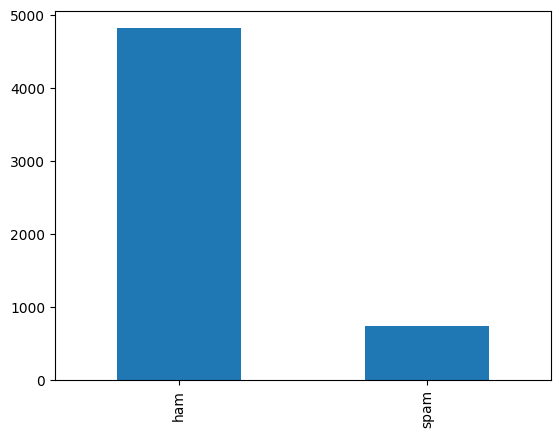

In [ ]:
print(df_spam.label.value_counts())
df_spam.label.value_counts().plot(kind='bar');

## Message Length

In [ ]:
df_spam['message_len'] = df_spam.message.apply(len)

df_spam.sort_values(by='message_len', ascending=False).head(10)

,label,message,message_len
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


# Text Preprocessing

## Text Cleaning

In [ ]:
# Defining a function to clean up the text
def clean_text(text):

    # Replacing all non-alphabetic characters with a space
    sms = re.sub('[^a-zA-Z]', ' ', text)

    # Converting to lowecase
    sms = sms.lower()

    # Splitting text (check the defaults of split func!)
    sms = sms.split()

    # Rejoining text
    sms = ' '.join(sms)

    return sms

In [ ]:
df_spam["cleaned_text"] = df_spam["message"].apply(clean_text)

# Lets have a look at a sample of texts after cleaning
print("The First 10 Texts after cleaning: \n")
print(*df_spam["cleaned_text"][:10], sep="\n")

The First 10 Texts after cleaning: 

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only
had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call t

## Tokenization

In [ ]:
df_spam["tokenized_text"] = df_spam.apply(
    lambda row: nltk.word_tokenize(row["cleaned_text"]),
    axis=1
)

df_spam.head(10)

,label,message,message_len,cleaned_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,149,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we..."
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi..."
8,spam,WINNER!! As a valued network customer you have...,159,winner as a valued network customer you have b...,"[winner, as, a, valued, network, customer, you..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile months or more u r entitled to...,"[had, your, mobile, months, or, more, u, r, en..."


In [ ]:
df_spam["tokenized_text"] = df_spam["cleaned_text"].apply(nltk.word_tokenize)
df_spam.head()

,label,message,message_len,cleaned_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


## Remove Stopwords

In [ ]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [ ]:
df_spam["no_stopword_text"] = df_spam["tokenized_text"].apply(remove_stopwords)

print("The First 10 Texts after removing the stopwords: \n")
print(*df_spam["no_stopword_text"][:10], sep="\n")

The First 10 Texts after removing the stopwords: 

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl',

In [ ]:
df_spam

,label,message,message_len,cleaned_text,tokenized_text,no_stopword_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,162,this is the nd time we have tried contact u u ...,"[this, is, the, nd, time, we, have, tried, con...","[nd, time, tried, contact, u, u, pound, prize,..."
5568,ham,Will ï¿½_ b going to esplanade fr home?,39,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin..."


## Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

# lemmatize string function
def lemmatize_word(text):
    # provide context i.e. part-of-speech (pos)
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas

In [ ]:
df_spam["lemmatized_text"] = df_spam["no_stopword_text"].apply(lemmatize_word)

print("The First 10 Texts after lemitization: \n")
print(*df_spam["lemmatized_text"][:10], sep="\n")

The First 10 Texts after lemitization: 

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'value', 'network', 'customer', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours']


In [ ]:
df_spam.head()

,label,message,message_len,cleaned_text,tokenized_text,no_stopword_text,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


## Vectorization

### Creating a corpus of lemmatized text

In [ ]:
# Creating a corpus of text feature to encode further into vectorized form
corpus = []
for i in df_spam["lemmatized_text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

print("The First 10 lines in corpus : \n")
print(*corpus[:10], sep="\n")

The First 10 lines in corpus : 

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though
freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
even brother like speak treat like aid patent
per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune
winner value network customer select receivea prize reward claim call claim code kl valid hours
mobile months u r entitle update latest colour mobiles camera free call mobile update co free


### Converting the corpus in vector form

In [ ]:
# Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Let's have a look at our feature
X.dtype

dtype('float64')

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Label Encoding the classes in Target

In [ ]:
# Label encode the Target and use it as y
le = LabelEncoder()
df_spam["label"] = le.fit_transform(df_spam["label"])

In [ ]:
df_spam.head()

,label,message,message_len,cleaned_text,tokenized_text,no_stopword_text,lemmatized_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


# Model Building

In [ ]:
import numpy as np

In [ ]:
# Setting values for labels and feature as y and X (we already did X in vectorizing...)
y = df_spam["label"]

# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Testing on the following classifiers
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
]

for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "NaiveBayes",
    1: "RandomForest",
    2: "KNeighbours",
    3: "SVC"
}

# Model Evaluation

In [ ]:
# Cross-Validation
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train, scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.966568 
RandomForest: 0.977337 
KNeighbours: 0.914740 
SVC: 0.976217 
